Correlation between Error and Standard Deviation:
Correlation coefficient: -0.02


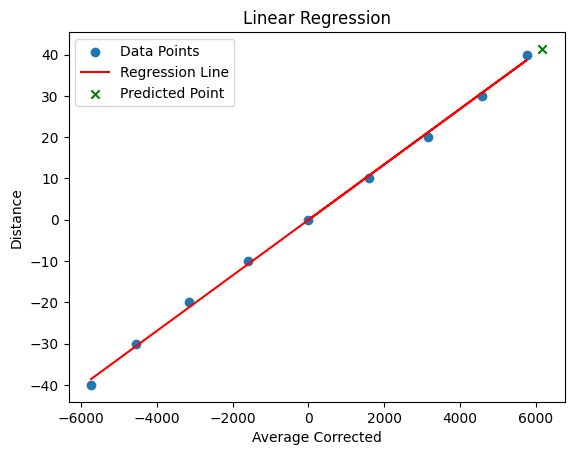

Linear Regression Results:
Slope: 0.01
Intercept: -0.05
R-squared value: 1.00
P-value: 0.00
Standard error: 0.00
------------------------------
Test file: Data_+45.csv
Test Average Corrected: 6165.91
Predicted Dist: 41.38


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression and analysis
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append(avg_corrected)
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(independent_vars, dependent_vars)

# Create empty lists to store the data for analysis
std_deviations = []
errors = []

# Loop through each file again to calculate errors and standard deviations
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        dist = extract_dist(file_name)
        std_deviation = df['corrected'].std()  # Calculate the standard deviation
        
        # Calculate the error in distance
        predicted_dist = slope * avg_corrected + intercept
        error = dist - predicted_dist
        
        # Append data for analysis
        std_deviations.append(std_deviation)
        errors.append(error)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Calculate correlation between error and standard deviation
correlation = np.corrcoef(errors, std_deviations)[0, 1]

# Print correlation results
print("Correlation between Error and Standard Deviation:")
print(f"Correlation coefficient: {correlation:.2f}")


# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_avg_corrected = test_df['corrected'].mean()
predicted_dist = slope * test_avg_corrected + intercept

# Plot the data points, regression line, and predicted point
plt.scatter(independent_vars, dependent_vars, label='Data Points')
plt.plot(independent_vars, slope * np.array(independent_vars) + intercept, color='red', label='Regression Line')
plt.scatter(test_avg_corrected, predicted_dist, color='green', marker='x', label='Predicted Point')
plt.xlabel('Average Corrected')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print regression results and prediction for the test file
print("Linear Regression Results:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard error: {std_err:.2f}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Average Corrected: {test_avg_corrected:.2f}")
print(f"Predicted Dist: {predicted_dist:.2f}")


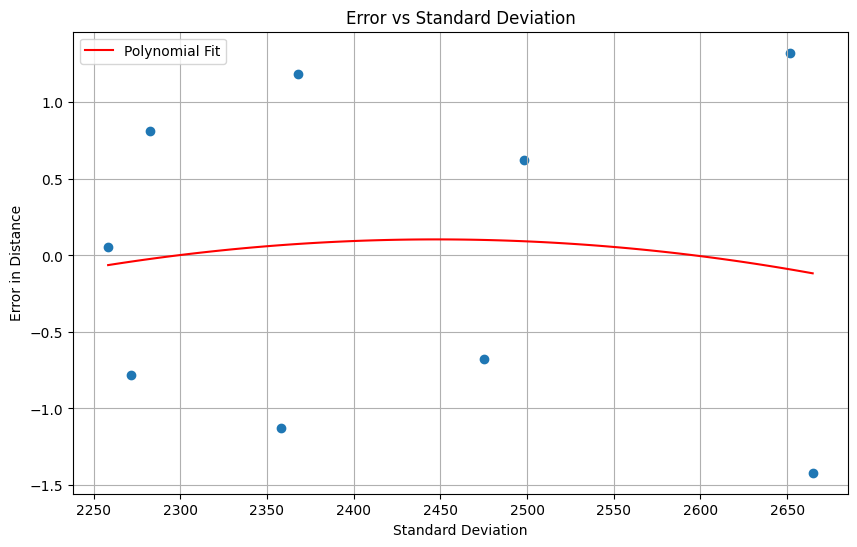

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression and analysis
independent_vars = []
dependent_vars = []
std_deviations = []
errors = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        dist = extract_dist(file_name)
        std_deviation = df['corrected'].std()  # Calculate the standard deviation
        
        # Append data for regression
        independent_vars.append(avg_corrected)
        dependent_vars.append(dist)
        
        # Calculate the error in distance
        predicted_dist = slope * avg_corrected + intercept
        error = dist - predicted_dist
        
        # Append data for analysis
        std_deviations.append(std_deviation)
        errors.append(error)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Create a DataFrame for analysis
data = pd.DataFrame({'Error': errors, 'Std_Deviation': std_deviations})

# Polynomial Regression
coefficients = np.polyfit(data['Std_Deviation'], data['Error'], 2)
poly_fit = np.poly1d(coefficients)
poly_x = np.linspace(min(data['Std_Deviation']), max(data['Std_Deviation']), 100)
poly_y = poly_fit(poly_x)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Std_Deviation'], data['Error'])
plt.plot(poly_x, poly_y, color='red', label='Polynomial Fit')
plt.xlabel('Standard Deviation')
plt.ylabel('Error in Distance')
plt.title('Error vs Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

# Rest of your code...


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_0.csv' - Actual: 0.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_+10.csv' - Actual: 10.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_+20.csv' - Actual: 20.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_+30.csv' - Actual: 30.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_+40.csv' - Actual: 40.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_-10.csv' - Actual: -10.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_-20.csv' - Actual: -20.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_-30.csv' - Actual: -30.00, Predicted: nan


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Processed 'Data_-40.csv' - Actual: -40.00, Predicted: nan

Test file: Data_+45.csv
Test Average Corrected: 6165.91
Predicted Dist: 41.38


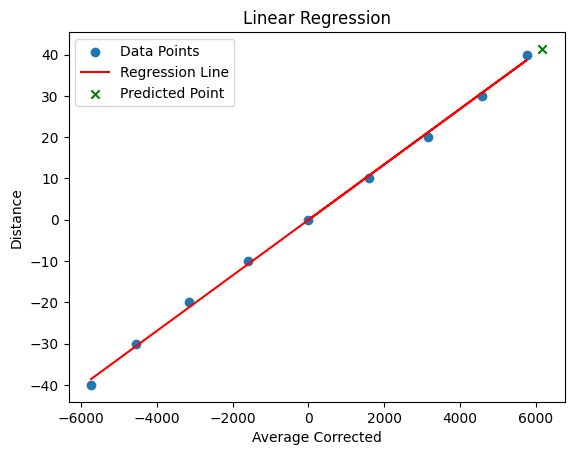


Linear Regression Results:
Slope: 0.01
Intercept: -0.05
R-squared value: 1.00
P-value: 0.00
Standard error: 0.00

Differences between Actual and Predicted Values:
Data_0.csv - Difference: nan
Data_+10.csv - Difference: nan
Data_+20.csv - Difference: nan
Data_+30.csv - Difference: nan
Data_+40.csv - Difference: nan
Data_-10.csv - Difference: nan
Data_-20.csv - Difference: nan
Data_-30.csv - Difference: nan
Data_-40.csv - Difference: nan


In [13]:
import pandas as pd
from scipy import stats
import re
import numpy as np
import matplotlib.pyplot as plt

file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

independent_vars = []
dependent_vars = []
differences = []  # To store the difference between actual and predicted values

for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        
        avg_corrected = df['corrected'].mean()
        dist = extract_dist(file_name)
        
        independent_vars.append(avg_corrected)
        dependent_vars.append(dist)
        
        # Perform linear regression for each file
        slope, intercept, _, _, _ = stats.linregress([avg_corrected], [dist])
        predicted_dist = slope * avg_corrected + intercept
        
        differences.append(predicted_dist - dist)
        
        print(f"Processed '{file_name}' - Actual: {dist:.2f}, Predicted: {predicted_dist:.2f}")
        
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
    except KeyError:
        print(f"Error: Required column 'corrected' not found in '{file_name}'.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

slope, intercept, r_value, p_value, std_err = stats.linregress(independent_vars, dependent_vars)

test_file_name = "Data_+45.csv"
try:
    test_df = pd.read_csv(test_file_name)
    
    test_avg_corrected = test_df['corrected'].mean()
    
    predicted_dist = slope * test_avg_corrected + intercept
    print(f"\nTest file: {test_file_name}")
    print(f"Test Average Corrected: {test_avg_corrected:.2f}")
    print(f"Predicted Dist: {predicted_dist:.2f}")
    
except FileNotFoundError:
    print(f"Error: Test file '{test_file_name}' not found.")
except KeyError:
    print(f"Error: Required column 'corrected' not found in test file '{test_file_name}'.")
except Exception as e:
    print(f"An error occurred while processing test file '{test_file_name}': {e}")

plt.scatter(independent_vars, dependent_vars, label='Data Points')
plt.plot(independent_vars, slope * np.array(independent_vars) + intercept, color='red', label='Regression Line')
plt.scatter(test_avg_corrected, predicted_dist, color='green', marker='x', label='Predicted Point')
plt.xlabel('Average Corrected')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.legend()
plt.show()

print("\nLinear Regression Results:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard error: {std_err:.2f}")

# Print the differences between actual and predicted values for each training file
print("\nDifferences between Actual and Predicted Values:")
for idx, diff in enumerate(differences):
    print(f"{file_names[idx]} - Difference: {diff:.2f}")


Predicted Distance for Avg Corrected 0.0000000000: -0.0539094813
Predicted Distance for Avg Corrected 1612.1536326597: 10.7792089268
Predicted Distance for Avg Corrected 3151.8140403555: 21.1251977749
Predicted Distance for Avg Corrected 4573.2514531594: 30.6767687237
Predicted Distance for Avg Corrected 5763.6645262512: 38.6759354992
Predicted Distance for Avg Corrected -1601.0114997338: -10.8121565851
Predicted Distance for Avg Corrected -3144.6785825735: -21.1850689132
Predicted Distance for Avg Corrected -4549.6041631683: -30.6256860237
Predicted Distance for Avg Corrected -5733.3855164830: -38.5802899213


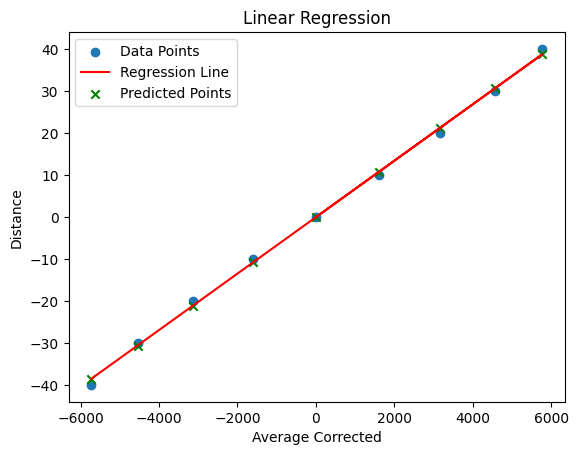

Linear Regression Results:
Slope: 0.0067196564
Intercept: -0.0539094813


In [15]:
import pandas as pd
from scipy import stats
import re
import numpy as np
import matplotlib.pyplot as plt

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append(avg_corrected)
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform linear regression
slope, intercept, _, _, _ = stats.linregress(independent_vars, dependent_vars)

# Calculate predicted distances for each average of corrected values
predicted_distances = [slope * avg_corr + intercept for avg_corr in independent_vars]

# Print the predicted distances for each average of corrected values
for idx, predicted_dist in enumerate(predicted_distances):
    print(f"Predicted Distance for Avg Corrected {independent_vars[idx]:.10f}: {predicted_dist:.10f}")

# Plot the data points, regression line, and predicted points
plt.scatter(independent_vars, dependent_vars, label='Data Points')
plt.plot(independent_vars, slope * np.array(independent_vars) + intercept, color='red', label='Regression Line')
plt.scatter(independent_vars, predicted_distances, color='green', marker='x', label='Predicted Points')
plt.xlabel('Average Corrected')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print regression results
print("Linear Regression Results:")
print(f"Slope: {slope:.10f}")
print(f"Intercept: {intercept:.10f}")


Error for Distance 0.0000000000: 0.0539094813
Error for Distance 10.0000000000: -0.7792089268
Error for Distance 20.0000000000: -1.1251977749
Error for Distance 30.0000000000: -0.6767687237
Error for Distance 40.0000000000: 1.3240645008
Error for Distance -10.0000000000: 0.8121565851
Error for Distance -20.0000000000: 1.1850689132
Error for Distance -30.0000000000: 0.6256860237
Error for Distance -40.0000000000: -1.4197100787


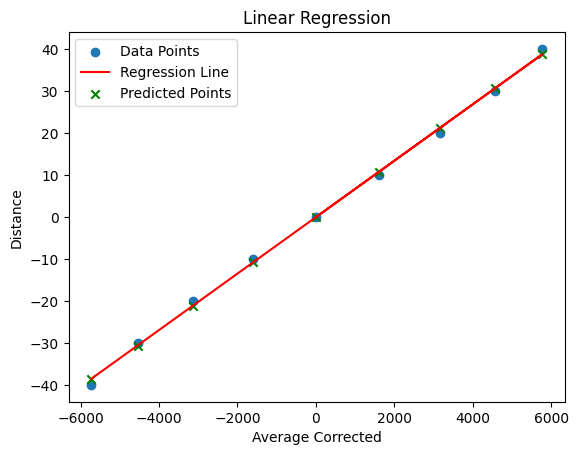

Linear Regression Results:
Slope: 0.0067196564
Intercept: -0.0539094813


In [16]:
import pandas as pd
from scipy import stats
import re
import numpy as np
import matplotlib.pyplot as plt

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append(avg_corrected)
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform linear regression
slope, intercept, _, _, _ = stats.linregress(independent_vars, dependent_vars)

# Calculate predicted distances for each average of corrected values
predicted_distances = [slope * avg_corr + intercept for avg_corr in independent_vars]

# Calculate errors for each distance value (actual - predicted)
errors = [actual_dist - predicted_dist for actual_dist, predicted_dist in zip(dependent_vars, predicted_distances)]

# Print the errors for each distance value
for idx, error in enumerate(errors):
    print(f"Error for Distance {dependent_vars[idx]:.10f}: {error:.10f}")

# Plot the data points, regression line, and predicted points
plt.scatter(independent_vars, dependent_vars, label='Data Points')
plt.plot(independent_vars, slope * np.array(independent_vars) + intercept, color='red', label='Regression Line')
plt.scatter(independent_vars, predicted_distances, color='green', marker='x', label='Predicted Points')
plt.xlabel('Average Corrected')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print regression results
print("Linear Regression Results:")
print(f"Slope: {slope:.10f}")
print(f"Intercept: {intercept:.10f}")



Error for Distance 0.0000000000: 0.0539094813 | A: 2258.3786894253
Error for Distance 10.0000000000: -0.7792089268 | A: 2271.7168551659
Error for Distance 20.0000000000: -1.1251977749 | A: 2358.2926523368
Error for Distance 30.0000000000: -0.6767687237 | A: 2474.9022487979
Error for Distance 40.0000000000: 1.3240645008 | A: 2651.7390337709
Error for Distance -10.0000000000: 0.8121565851 | A: 2282.6727382138
Error for Distance -20.0000000000: 1.1850689132 | A: 2367.8424027126
Error for Distance -30.0000000000: 0.6256860237 | A: 2498.5084385668
Error for Distance -40.0000000000: -1.4197100787 | A: 2664.7122058773


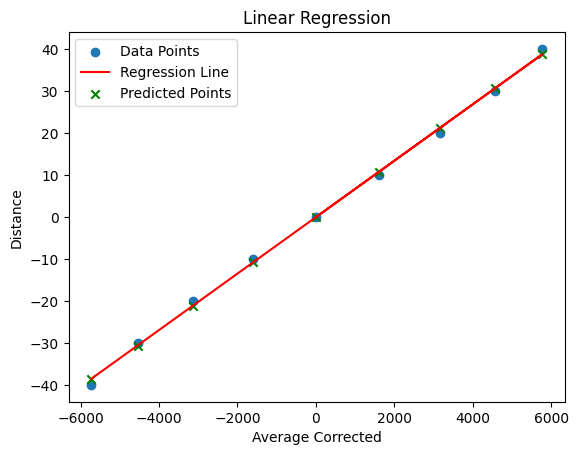

Linear Regression Results:
Slope: 0.0067196564
Intercept: -0.0539094813


In [21]:
import pandas as pd
from scipy import stats
import re
import numpy as np
import matplotlib.pyplot as plt

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []
std_deviations = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        std_dev_corrected = df['corrected'].std()  # Calculate standard deviation
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append(avg_corrected)
        dependent_vars.append(dist)
        std_deviations.append(std_dev_corrected)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform linear regression
slope, intercept, _, _, _ = stats.linregress(independent_vars, dependent_vars)

# Calculate predicted distances for each average of corrected values
predicted_distances = [slope * avg_corr + intercept for avg_corr in independent_vars]

# Calculate errors for each distance value (actual - predicted)
errors = [actual_dist - predicted_dist for actual_dist, predicted_dist in zip(dependent_vars, predicted_distances)]

# Print errors and standard deviations side by side
for idx, (error, std_dev) in enumerate(zip(errors, std_deviations)):
    print(f"Error for Distance {dependent_vars[idx]:.10f}: {error:.10f} | A: {std_dev:.10f}")

# Plot the data points, regression line, and predicted points
plt.scatter(independent_vars, dependent_vars, label='Data Points')
plt.plot(independent_vars, slope * np.array(independent_vars) + intercept, color='red', label='Regression Line')
plt.scatter(independent_vars, predicted_distances, color='green', marker='x', label='Predicted Points')
plt.xlabel('Average Corrected')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print regression results
print("Linear Regression Results:")
print(f"Slope: {slope:.10f}")
print(f"Intercept: {intercept:.10f}")
